# Heart Dataset

In [1]:
#The target column is categorical & the features are mix of categorical and continuous.
#so we need to go with either Logistic Regression or Decision Tree Classifier, whichever has maximum accuracy.

# import libraries

In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Loading Dataset

In [2]:
df= pd.read_csv(r"https://raw.githubusercontent.com/manishanker/stats_ml_jun2020/master/datasets_737503_1278636_heart.csv") 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Data Analysis

In [4]:
df. shape

(303, 14)

In [5]:
df.isna().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Finding the duplicate rows

In [7]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [8]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df[df['age']==38]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.shape

(302, 14)

In [12]:
df[162:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


### After removing the duplicate rows reset the index

In [13]:
df=df.reset_index()
df[162:166]

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [14]:

df=df.drop('index',axis=1)
df[162:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [15]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
301,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
for i in df.columns:
    print('column:',i)
    print(df[i]. unique()) 
    print()
    print('min:',df[i].min())
    print('max:',df[i].max())
    print()

column: age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

min: 29
max: 77

column: sex
[1 0]

min: 0
max: 1

column: cp
[3 2 1 0]

min: 0
max: 3

column: trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

min: 94
max: 200

column: chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 

## Data Visualization

In [141]:
%matplotlib inline

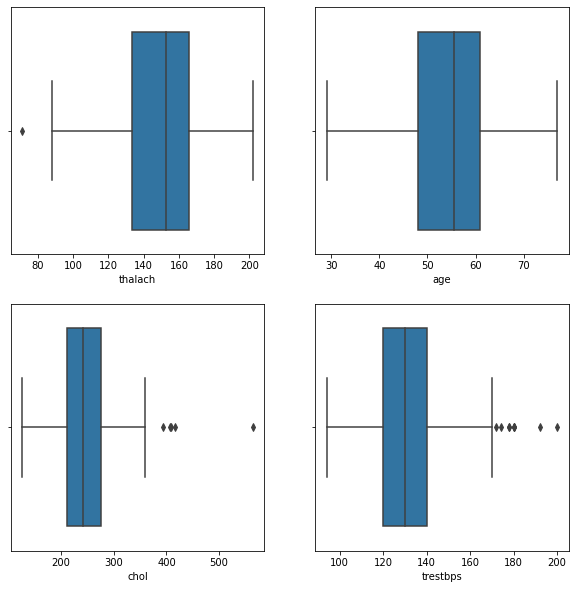

In [142]:
f, axes = plt.subplots(2,2,figsize = (10,10))
sns.boxplot('thalach',hue='target',  data=df ,ax=axes[0,0])
sns.boxplot('age',hue='target',  data=df ,ax=axes[0,1])
sns.boxplot('chol',hue='target',data=df,ax=axes[1,0])
sns.boxplot('trestbps',hue='target',data=df,ax=axes[1,1])

In [124]:
df[df['chol']>400]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
219,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
245,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


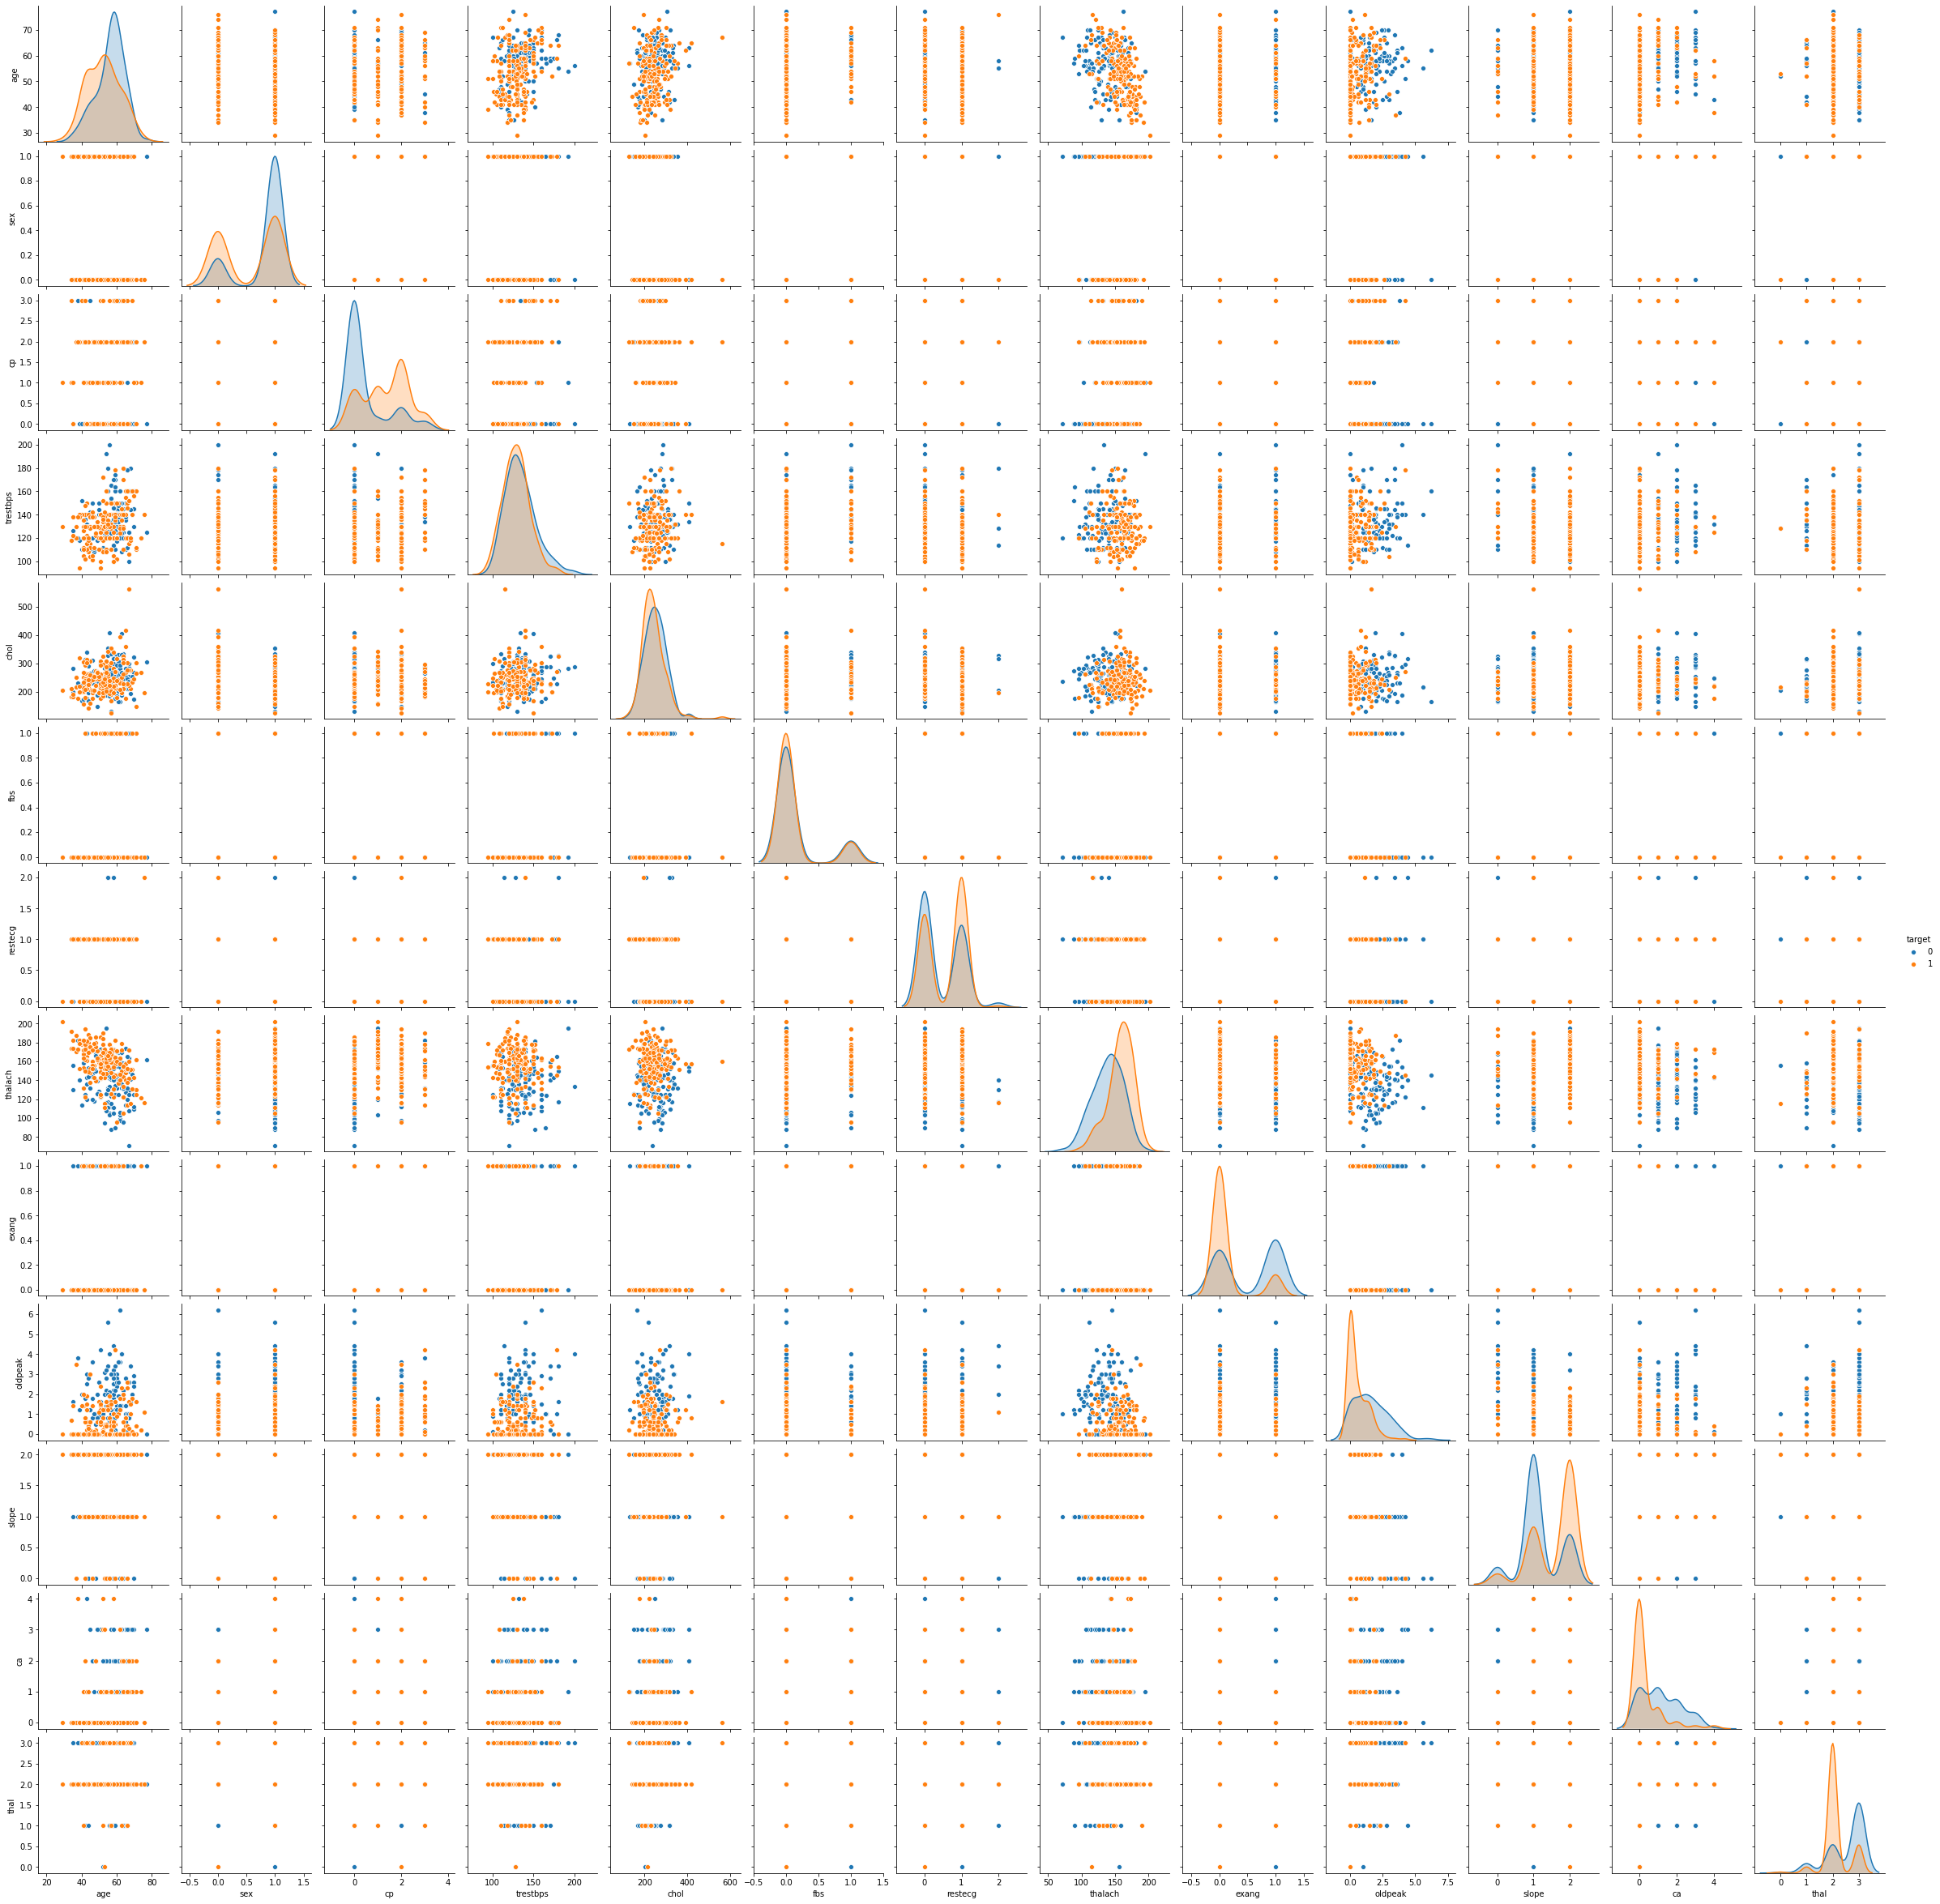

In [69]:
sns.pairplot(data=df,hue='target')

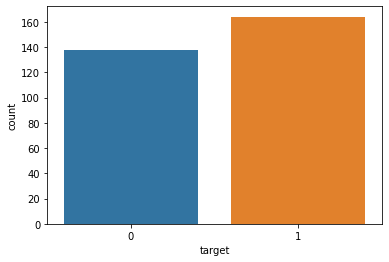

In [70]:
sns.countplot('target',data=df)

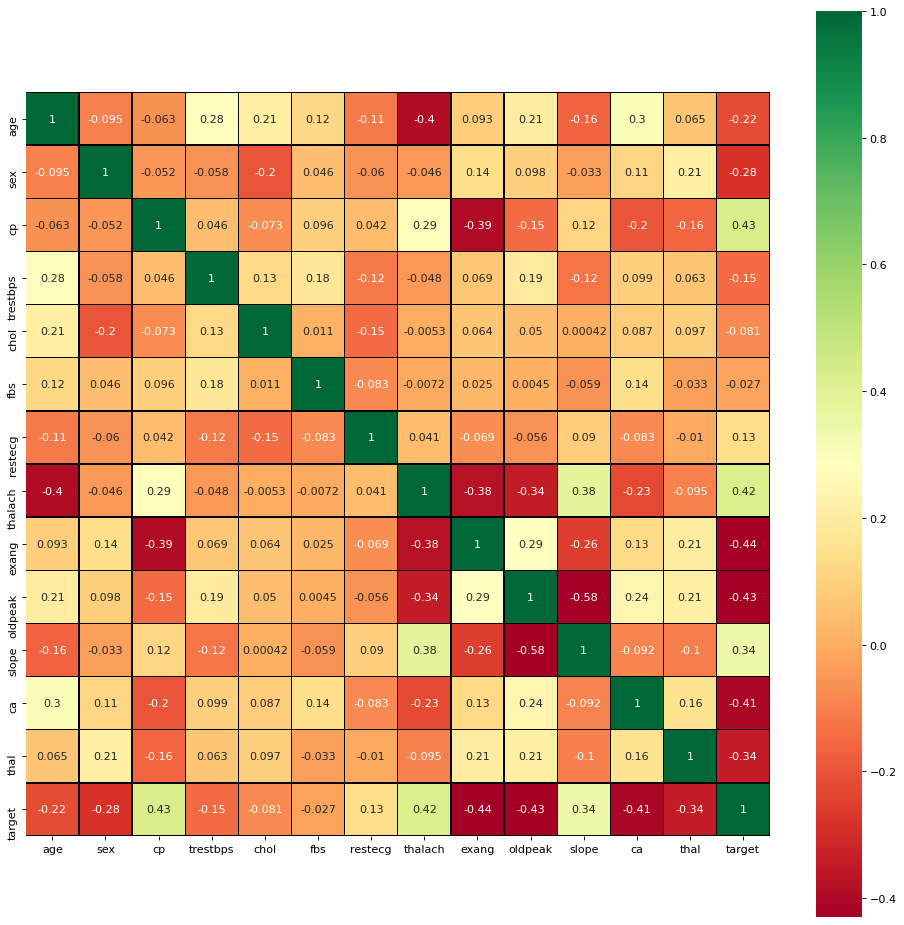

In [143]:

plt.figure(figsize=(15,15), dpi= 80)
pearsonscorr=df.corr()
sns.heatmap(pearsonscorr,
            xticklabels=True,
            yticklabels=True,
            cmap='RdYlGn',
            robust=True,
            square=True,
            fmt='.2g',
            annot=True,
            linewidths=0.3,
            linecolor='black',
            mask=False
            )

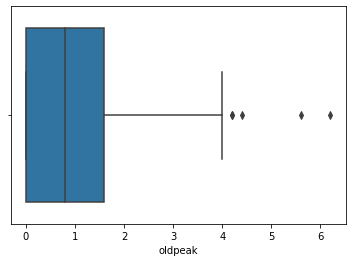

In [121]:
sns.boxplot('oldpeak',hue='target',data=df)

## Convert Categorical variables into indicator/dummy variables

In [16]:
sex=pd.get_dummies(data=df['sex'],prefix='sex')
thal=pd.get_dummies(data=df['thal'],prefix='thal')
ca=pd.get_dummies(data=df['ca'],prefix="ca")
slope=pd.get_dummies(data=df['slope'],prefix="slope")
exang=pd.get_dummies(data=df['exang'],prefix="exang")
restecg=pd.get_dummies(data=df['restecg'],prefix="restecg")
fbs=pd.get_dummies(data=df['fbs'],prefix="fbs")
cp=pd.get_dummies(data=df['cp'],prefix="cp")

In [17]:
pd.set_option('display.max_columns',40)

In [18]:
df=pd.concat([df,sex,thal,ca,slope,exang,restecg,fbs,cp],axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_0,sex_1,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,exang_0,exang_1,restecg_0,restecg_1,restecg_2,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [19]:
df.drop(['sex','thal','ca','slope','exang','restecg','fbs','cp'],axis=1,inplace=True)

In [20]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,exang_0,exang_1,restecg_0,restecg_1,restecg_2,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3
0,63,145,233,150,2.3,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


In [23]:
#pd.Series(df.columns)

In [21]:
df.shape

(302, 31)

## Label Encode the target variable

In [22]:
Lencode=LabelEncoder()
df['target']=Lencode.fit_transform(df['target'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,exang_0,exang_1,restecg_0,restecg_1,restecg_2,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3
0,63,145,233,150,2.3,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


In [23]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

## Identify the Target Variable and the Features

In [24]:
X=df.drop('target',axis=1)
y=df['target']
X.shape

(302, 30)

### Split the input for the model into test and train

In [25]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### Apply Logistic Regression

In [26]:
Logistic=LogisticRegression(max_iter=1500)

### Train the Model

In [27]:
Logistic.fit(X_train,y_train)
y_train_predict=Logistic.predict(X_train)
Act_train=y_train.value_counts()
pred_train=pd.Series(y_train_predict).value_counts()
#compare_train_result=pd.DataFrame({'Actual':y_train,'Predict':y_train_predict})
compare_train_result=pd.DataFrame({'Actual':Act_train,'Predict':pred_train})
print("Trained_Model")
compare_train_result

Trained_Model


,Actual,Predict
1,120,122
0,106,104


In [28]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       106
           1       0.87      0.88      0.88       120

    accuracy                           0.87       226
   macro avg       0.87      0.87      0.87       226
weighted avg       0.87      0.87      0.87       226



In [29]:
confusion_matrix(y_train,y_train_predict)

array([[ 90,  16],
       [ 14, 106]])

In [31]:
TrainAcc=accuracy_score(y_train,y_train_predict)
TrainAcc

0.8672566371681416

### Validate the Model

In [32]:
print("Validate the Model")
y_test_predict=Logistic.predict(X_test)
Act_test=y_test.value_counts()
pred_test=pd.Series(y_test_predict).value_counts()
#compare_train_result=pd.DataFrame({'Actual':y_train,'Predict':y_train_predict})
compare_test_result=pd.DataFrame({'Actual':Act_test,'Predict':pred_test})

compare_test_result

Validate the Model


,Actual,Predict
1,44,45
0,32,31


In [33]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_test_predict)
print(clf_report)


              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.87      0.89      0.88        44

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.85      0.86      0.85        76



In [34]:
y_test.value_counts()

1    44
0    32
Name: target, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predict)

array([[26,  6],
       [ 5, 39]])

In [50]:
print('Logistic Regression')
print()
print('Trained Model Accuracy:',accuracy_score(y_train,y_train_predict))
print('Validate Accuracy-Model:',accuracy_score(y_test,y_test_predict))

Logistic Regression

Trained Model Accuracy: 0.8672566371681416
Validate Accuracy-Model: 0.8552631578947368


# Decision Tree

In [66]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [67]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_train_predict_DT=clf.predict(X_train)
print('Train Model Accuracy:',metrics.accuracy_score(y_train,y_train_predict_DT))

Train Model Accuracy: 1.0


In [68]:
#Accuracy=1, for the train data - clearly indicates that the decision tree suffers from overfit input data

In [69]:
y_test_predict_DT=clf.predict(X_test)
print('Validate Model Accuracy:',metrics.accuracy_score(y_test,y_test_predict_DT))

Validate Model Accuracy: 0.6973684210526315


In [70]:
print(metrics.classification_report(y_test,y_test_predict_DT))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        32
           1       0.76      0.70      0.73        44

    accuracy                           0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76



## Visualize Tree

In [71]:
tree.plot_tree(clf,filled=True, 
                rounded=True,
                feature_names = X.columns,
                class_names=['0','1'])
plt.savefig('Heart_tree.png')

### Specifying Maximum Depth of the tree to control overfit

In [72]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)

clf.fit(X_train,y_train)
y_train_predict_DT=clf.predict(X_train)
print('Train Model Accuracy:',metrics.accuracy_score(y_train,y_train_predict_DT))

Train Model Accuracy: 0.8716814159292036


In [73]:
y_test_predict_DT=clf.predict(X_test)
print('Validate Model Accuracy:',metrics.accuracy_score(y_test,y_test_predict_DT))

Validate Model Accuracy: 0.7763157894736842


In [74]:
print(metrics.classification_report(y_test,y_test_predict_DT))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.79      0.84      0.81        44

    accuracy                           0.78        76
   macro avg       0.77      0.76      0.77        76
weighted avg       0.78      0.78      0.77        76



In [75]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
tree.plot_tree(clf,filled=True, 
                rounded=True,
                feature_names = X.columns,
                class_names=['0','1'])
plt.savefig('Heart_tree_depth3.png')

In [78]:
print('Decision Tree')
print()
print('Train Model Accuracy:',metrics.accuracy_score(y_train,y_train_predict_DT))
print('Validate Model Accuracy:',metrics.accuracy_score(y_test,y_test_predict_DT))

Decision Tree

Train Model Accuracy: 0.8716814159292036
Validate Model Accuracy: 0.7763157894736842


# Accuracy of the Model is good using Logistic Regression than the Decision Tree Classifier